<a href="https://colab.research.google.com/github/joowop/Metaverse_AI_Project/blob/main/%EC%9B%B9%ED%88%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 웹툰 글씨 번역 (OCR)
- paddleocr

In [1]:
!pip install -q paddlepaddle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00


In [2]:
# libssl 설치 (오류를 잡기 위한 과정)
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
!sudo dpkg -i libssl1.1_1.1.0g-2ubuntu4_amd64.deb

--2023-08-01 00:27:44--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 185.125.190.36, 91.189.91.81, 91.189.91.82, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|185.125.190.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1128092 (1.1M) [application/x-debian-package]
Saving to: ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb’

libssl1.1_1.1.0g-2u 100%[===================>]   1.08M  1.75MB/s    in 0.6s    

2023-08-01 00:27:44 (1.75 MB/s) - ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb’ saved [1128092/1128092]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 120493 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.0g-2ubuntu4_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.0g-2ubuntu4) ...
Setting up libssl1.1:amd64 (1.1.0g-2ubuntu4) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like pro

In [3]:
!pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 66.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

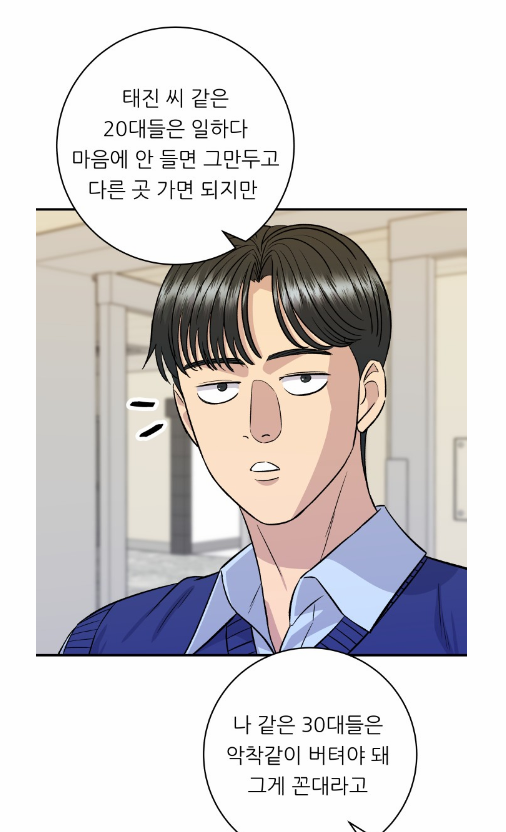

In [4]:
from PIL import Image

img = Image.open('webtoon.png').convert('RGB')
img

In [5]:
from paddleocr import PaddleOCR, draw_ocr

ocr = PaddleOCR(lang='korean')
img_path = 'webtoon.png'

result = ocr.ocr(img_path, cls = False)
result

download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/Multilingual_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer/Multilingual_PP-OCRv3_det_infer.tar


100%|██████████| 3.85M/3.85M [00:20<00:00, 187kiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/korean_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/korean/korean_PP-OCRv3_rec_infer/korean_PP-OCRv3_rec_infer.tar


100%|██████████| 10.9M/10.9M [00:06<00:00, 1.74MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:09<00:00, 234kiB/s]

[2023/08/01 00:37:44] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dic

[2023/08/01 00:37:47] ppocr DEBUG: dt_boxes num : 22, elapse : 1.1643955707550049
[2023/08/01 00:37:49] ppocr DEBUG: rec_res num  : 22, elapse : 2.634561538696289


[[[[[121.0, 85.0], [162.0, 87.0], [160.0, 110.0], [119.0, 108.0]],
   ('태진', 0.999958336353302)],
  [[[166.0, 88.0], [183.0, 88.0], [183.0, 107.0], [166.0, 107.0]],
   ('씨', 0.99483722448349)],
  [[[190.0, 86.0], [229.0, 86.0], [229.0, 110.0], [190.0, 110.0]],
   ('같은', 0.9999982118606567)],
  [[[103.0, 117.0], [186.0, 117.0], [186.0, 141.0], [103.0, 141.0]],
   ('20대들은', 0.9999149441719055)],
  [[[191.0, 116.0], [249.0, 116.0], [249.0, 141.0], [191.0, 141.0]],
   ('일하다', 0.999819815158844)],
  [[[72.0, 148.0], [127.0, 148.0], [127.0, 170.0], [72.0, 170.0]],
   ('마음에', 0.9999956488609314)],
  [[[135.0, 149.0], [153.0, 149.0], [153.0, 171.0], [135.0, 171.0]],
   ('안', 0.9995597004890442)],
  [[[158.0, 146.0], [199.0, 146.0], [199.0, 173.0], [158.0, 173.0]],
   ('들면', 0.9999778866767883)],
  [[[204.0, 149.0], [279.0, 149.0], [279.0, 170.0], [204.0, 170.0]],
   ('그만두고', 0.9997982978820801)],
  [[[88.0, 179.0], [128.0, 179.0], [128.0, 201.0], [88.0, 201.0]],
   ('다른', 0.9999915957450867)],

In [6]:
!wget -q https://github.com/kairess/toy-datasets/raw/master/NanumSquareNeo-Variable.ttf

In [8]:
len(result)

1

In [9]:
# 첫번째 배열 : 위치 정보 , 두번째 배열 : 글자정보와 정확도
result[0][0]


[[[121.0, 85.0], [162.0, 87.0], [160.0, 110.0], [119.0, 108.0]],
 ('태진', 0.999958336353302)]

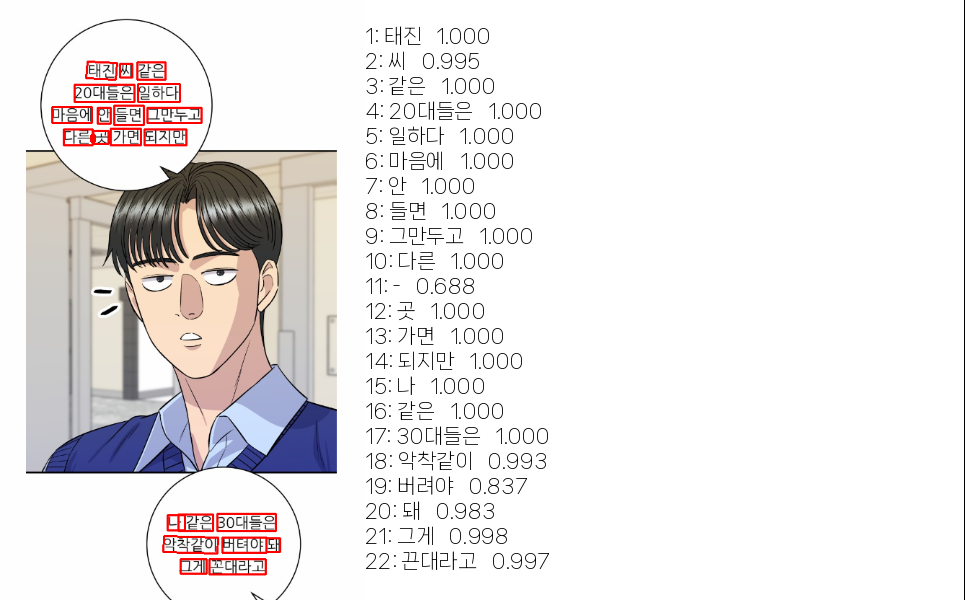

In [13]:
boxes = [temp[0] for temp in result[0]]
texts = [temp[1][0] for temp in result[0]]
scores = [temp[1][1] for temp in result[0]]

result_np = draw_ocr(img, boxes, texts, scores, font_path = 'NanumSquareNeo-Variable.ttf')
result_np = Image.fromarray(result_np)
result_np

In [14]:
result[0][0] # r값에 [[121.0, 85.0], [162.0, 87.0], [160.0, 110.0], [119.0, 108.0]] 이게 들어있다.
# r은 result[0][0][0][0] == r[0][0]

[[[121.0, 85.0], [162.0, 87.0], [160.0, 110.0], [119.0, 108.0]],
 ('태진', 0.999958336353302)]

In [15]:
result[0][0][0][2]

[160.0, 110.0]

In [16]:
# 글씨 박스 수정
boxes = []

for i, r in enumerate(result[0]):
    x1, y1 = r[0][0]
    x2, y2 = r[0][2]

    w = x2-x1
    h = y2-y1

    text, conf = r[1]

    boxes.append([int(x1), int(y1), int(w),int(h), text, conf, i])

boxes

[[121, 85, 39, 25, '태진', 0.999958336353302, 0],
 [166, 88, 17, 19, '씨', 0.99483722448349, 1],
 [190, 86, 39, 24, '같은', 0.9999982118606567, 2],
 [103, 117, 83, 24, '20대들은', 0.9999149441719055, 3],
 [191, 116, 58, 25, '일하다', 0.999819815158844, 4],
 [72, 148, 55, 22, '마음에', 0.9999956488609314, 5],
 [135, 149, 18, 22, '안', 0.9995597004890442, 6],
 [158, 146, 41, 27, '들면', 0.9999778866767883, 7],
 [204, 149, 75, 21, '그만두고', 0.9997982978820801, 8],
 [88, 179, 40, 22, '다른', 0.9999915957450867, 9],
 [126, 187, 5, 9, '-', 0.687953770160675, 10],
 [129, 181, 21, 18, '곳', 0.9999469518661499, 11],
 [153, 178, 42, 23, '가면', 0.9999823570251465, 12],
 [200, 179, 58, 22, '되지만', 0.999987781047821, 13],
 [232, 714, 24, 21, '나', 0.9999836683273315, 14],
 [247, 713, 48, 23, '같은', 0.9999937415122986, 15],
 [301, 712, 81, 24, '30대들은', 0.999761700630188, 16],
 [227, 743, 74, 24, '악착같이', 0.992794394493103, 17],
 [308, 745, 61, 21, '버려야', 0.8370987772941589, 18],
 [369, 746, 19, 19, '돼', 0.983141303062439, 19]

In [20]:
# 클러스터링을 통해 글씨가 있는 곳을 자동으로 묶어준다.(군집화) => 총 글씨 묶음을 두개로 묶을 수 있다.
# 박스의 중심점 찾기
import numpy as np
from sklearn.cluster import DBSCAN

def calculate_center(box):
    center_x = box[0] + box[2]/2
    center_y = box[1] + box[3]/2
    return np.array([center_x, center_y])

def cluster_boxes(boxes, eps):
    centers = np.array([calculate_center(box) for box in boxes])

    clustering = DBSCAN(eps = eps, min_samples=1).fit(centers)
    labels = clustering.labels_
    print(labels)

    clusters = {}
    for i, label in enumerate(labels):
        if label in clusters:
            clusters[label].append(i)
        else:
            clusters[label] = [i]
    return list(clusters.values())
clusters = cluster_boxes(boxes, 100)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


In [21]:
clusters
# 첫번째 군집, 두번째 군집 잘 되어있다.


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [14, 15, 16, 17, 18, 19, 20, 21]]

In [22]:
# 군집화된 데이터에 번호에 해당하는 데이터 추출
ocr_result = []

for c in clusters:
    sub_result = []

    for i, box in enumerate(boxes):
        if i in c:
            sub_result.append(box)

    ocr_result.append(sub_result)
ocr_result

[[[121, 85, 39, 25, '태진', 0.999958336353302, 0],
  [166, 88, 17, 19, '씨', 0.99483722448349, 1],
  [190, 86, 39, 24, '같은', 0.9999982118606567, 2],
  [103, 117, 83, 24, '20대들은', 0.9999149441719055, 3],
  [191, 116, 58, 25, '일하다', 0.999819815158844, 4],
  [72, 148, 55, 22, '마음에', 0.9999956488609314, 5],
  [135, 149, 18, 22, '안', 0.9995597004890442, 6],
  [158, 146, 41, 27, '들면', 0.9999778866767883, 7],
  [204, 149, 75, 21, '그만두고', 0.9997982978820801, 8],
  [88, 179, 40, 22, '다른', 0.9999915957450867, 9],
  [126, 187, 5, 9, '-', 0.687953770160675, 10],
  [129, 181, 21, 18, '곳', 0.9999469518661499, 11],
  [153, 178, 42, 23, '가면', 0.9999823570251465, 12],
  [200, 179, 58, 22, '되지만', 0.999987781047821, 13]],
 [[232, 714, 24, 21, '나', 0.9999836683273315, 14],
  [247, 713, 48, 23, '같은', 0.9999937415122986, 15],
  [301, 712, 81, 24, '30대들은', 0.999761700630188, 16],
  [227, 743, 74, 24, '악착같이', 0.992794394493103, 17],
  [308, 745, 61, 21, '버려야', 0.8370987772941589, 18],
  [369, 746, 19, 19, '돼', 0

In [24]:
ocr_result[0][1]

[166, 88, 17, 19, '씨', 0.99483722448349, 1]

In [25]:
final_result = []

for sub_result in ocr_result:
    x1 = sub_result[0][0]
    y1 = sub_result[0][1]
    x2 = sub_result[-1][0] + sub_result[-1][2]
    y2 = sub_result[-1][1] + sub_result[-1][3]

    w = x2 - x1
    h = y2 - y1

    text = ''

    for r in sub_result:
        text += r[4] + ' '

    text = text.strip()

    final_result.append([x1,y1,w,h,text])
final_result

[[121, 85, 137, 116, '태진 씨 같은 20대들은 일하다 마음에 안 들면 그만두고 다른 - 곳 가면 되지만'],
 [232, 714, 136, 82, '나 같은 30대들은 악착같이 버려야 돼 그게 끈대라고']]

In [26]:
!pip install translate

In [30]:
from translate import Translator

translator = Translator(from_lang='ko', to_lang='en')

for i,r in enumerate(final_result):
    text_en = translator.translate(r[4])

    final_result[i].append(text_en)

final_result

[[121,
  85,
  137,
  116,
  '태진 씨 같은 20대들은 일하다 마음에 안 들면 그만두고 다른 - 곳 가면 되지만',
  "Twentysomethings like Taejin can quit if they don't like working and go somewhere else - but"],
 [232,
  714,
  136,
  82,
  '나 같은 30대들은 악착같이 버려야 돼 그게 끈대라고',
  "Thirty-somethings like me have to get rid of it like a badass. That's the tenacity."]]

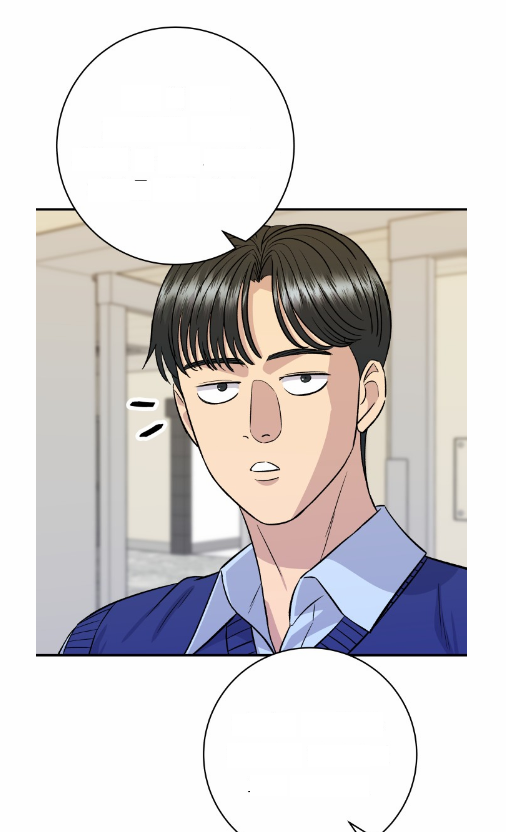

In [31]:
# 번역된 글자를 넣기 위한 과정 (글자를 다 흰색으로 채운다.)
from PIL import Image, ImageDraw

result_img = img.copy()
draw = ImageDraw.Draw(result_img)

for box in boxes:
    x1, y1, w, h, _, _, _ = box
    x2 = x1+w
    y2 = y1+h

    draw.rectangle([(x1, y1), (x2, y2)], outline='white', fill = 'white')

result_img

In [32]:
from PIL import Image, ImageDraw, ImageFont
import textwrap # 글자 줄바꿈해주는 함수

<ipython-input-34-87e218785291>:13: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  line_height = font.getsize('hg')[1]*1.2


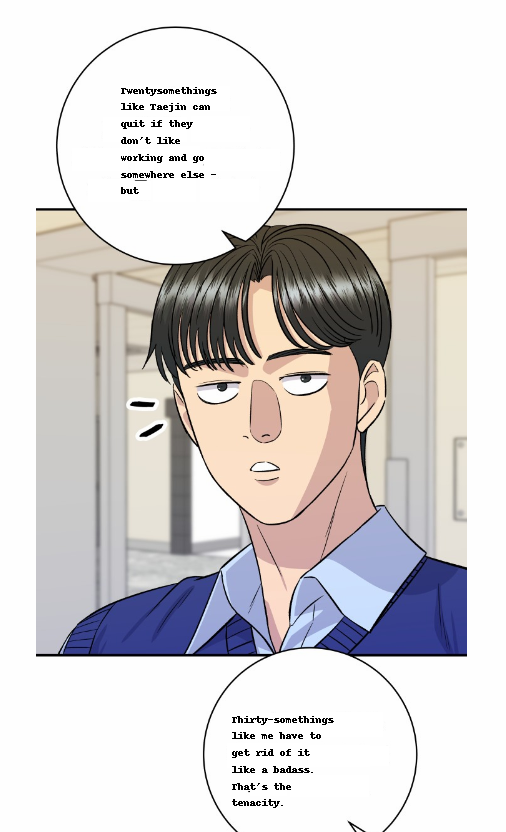

In [34]:
result_img2 = result_img.copy()

draw = ImageDraw.Draw(result_img2)

for r in final_result:
    x1,y1,w,h,text_ko, text_en = r

    text_position = (x1,y1)

    font = ImageFont.truetype('NanumSquareNeo-Variable.ttf', 12)
    wrapped_text = textwrap.wrap(text_en, width = w/8)

    line_height = font.getsize('hg')[1]*1.2

    for line in wrapped_text:
        draw.text(text_position, line, fill = 'black', stroke_width=1)
        text_position = (text_position[0], text_position[1] + line_height)

result_img2